# What Is Apache Spark?

Apache Spark is a unified computing engine and a set of libraries for parallel data processing on
computer clusters. As of this writing, Spark is the most actively developed open source engine
for this task, making it a standard tool for any developer or data scientist interested in big data.
Spark supports multiple widely used programming languages (Python, Java, Scala, and R),
includes libraries for diverse tasks ranging from SQL to streaming and machine learning, and
runs anywhere from a laptop to a cluster of thousands of servers. This makes it an easy system to
start with and scale-up to big data processing or incredibly large scale.
Figure 1-1 illustrates all the components and libraries Spark offers to end-users.
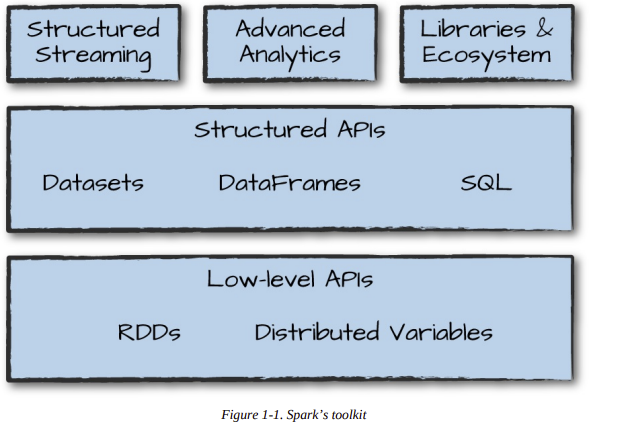
You’ll notice the categories roughly correspond to the different parts of this book. That should
really come as no surprise; our goal here is to educate you on all aspects of Spark, and Spark is
composed of a number of different components.

Given that you’re reading this book, you might already know a little bit about Apache Spark and
what it can do. Nonetheless, in this chapter, we want to briefly cover the overriding philosophy
behind Spark as well as the context it was developed in (why is everyone suddenly excited about
parallel data processing?) and its history. We will also outline the first few steps to running
Spark.

## Apache Spark’s Philosophy
Let’s break down our description of Apache Spark—a unified computing engine and set of
libraries for big data—into its key components:

___Unified___

Spark’s key driving goal is to offer a unified platform for writing big data applications. What
do we mean by unified? Spark is designed to support a wide range of data analytics tasks,
ranging from simple data loading and SQL queries to machine learning and streaming
computation, over the same computing engine and with a consistent set of APIs. The main
insight behind this goal is that real-world data analytics tasks—whether they are interactive
analytics in a tool such as a Jupyter notebook, or traditional software development for
production applications—tend to combine many different processing types and libraries.

Spark’s unified nature makes these tasks both easier and more efficient to write. First, Spark
provides consistent, composable APIs that you can use to build an application out of smaller
pieces or out of existing libraries. It also makes it easy for you to write your own analytics
libraries on top. However, composable APIs are not enough: Spark’s APIs are also designed
to enable high performance by optimizing across the different libraries and functions
composed together in a user program. For example, if you load data using a SQL query and
then evaluate a machine learning model over it using Spark’s ML library, the engine can
combine these steps into one scan over the data. The combination of general APIs and highperformance execution, no matter how you combine them, makes Spark a powerful platform
for interactive and production applications.

Spark’s focus on defining a unified platform is the same idea behind unified platforms in
other areas of software. For example, data scientists benefit from a unified set of libraries
(e.g., Python or R) when doing modeling, and web developers benefit from unified
frameworks such as Node.js or Django. Before Spark, no open source systems tried to
provide this type of unified engine for parallel data processing, meaning that users had to
stitch together an application out of multiple APIs and systems. Thus, Spark quickly became
the standard for this type of development. Over time, Spark has continued to expand its builtin APIs to cover more workloads. At the same time, the project’s developers have continued
to refine its theme of a unified engine. 

In particular, one major focus of this book will be the “structured APIs” (DataFrames, Datasets, and SQL) that were finalized in Spark 2.0 to enable more powerful optimization under user applications.

___Computing engine___

At the same time that Spark strives for unification, it carefully limits its scope to a computing
engine. By this, we mean that Spark handles loading data from storage systems and
performing computation on it, not permanent storage as the end itself. You can use Spark
with a wide variety of persistent storage systems, including cloud storage systems such as
Azure Storage and Amazon S3, distributed file systems such as Apache Hadoop, key-value
stores such as Apache Cassandra, and message buses such as Apache Kafka. However, Spark
neither stores data long term itself, nor favors one over another. The key motivation here is
that most data already resides in a mix of storage systems. Data is expensive to move so
Spark focuses on performing computations over the data, no matter where it resides. 

In userfacing APIs, Spark works hard to make these storage systems look largely similar so that
applications do not need to worry about where their data is.

Spark’s focus on computation makes it different from earlier big data software platforms
such as Apache Hadoop. Hadoop included both a storage system (the Hadoop file system,
designed for low-cost storage over clusters of commodity servers) and a computing system
(MapReduce), which were closely integrated together. However, this choice makes it
difficult to run one of the systems without the other. More important, this choice also makes
it a challenge to write applications that access data stored anywhere else. 

Although Spark
runs well on Hadoop storage, today it is also used broadly in environments for which the
Hadoop architecture does not make sense, such as the public cloud (where storage can be
purchased separately from computing) or streaming applications.

___Libraries___

Spark’s final component is its libraries, which build on its design as a unified engine to
provide a unified API for common data analysis tasks. Spark supports both standard libraries
that ship with the engine as well as a wide array of external libraries published as third-party
packages by the open source communities. Today, Spark’s standard libraries are actually the
bulk of the open source project: the Spark core engine itself has changed little since it was
first released, but the libraries have grown to provide more and more types of functionality.
Spark includes libraries for SQL and structured data (Spark SQL), machine learning (MLlib),
stream processing (Spark Streaming and the newer Structured Streaming), and graph
analytics (GraphX). Beyond these libraries, there are hundreds of open source external
libraries ranging from connectors for various storage systems to machine learning algorithms.
One index of external libraries is available at spark-packages.org.

## Context: The Big Data Problem
Why do we need a new engine and programming model for data analytics in the first place? As
with many trends in computing, this is due to changes in the economic factors that underlie
computer applications and hardware.

For most of their history, computers became faster every year through processor speed increases:
the new processors each year could run more instructions per second than the previous year’s. As
a result, applications also automatically became faster every year, without any changes needed to
their code. This trend led to a large and established ecosystem of applications building up over
time, most of which were designed to run only on a single processor. These applications rode the
trend of improved processor speeds to scale up to larger computations and larger volumes of data
over time.

Unfortunately, this trend in hardware stopped around 2005: due to hard limits in heat dissipation,
hardware developers stopped making individual processors faster, and switched toward adding
more parallel CPU cores all running at the same speed. This change meant that suddenly
applications needed to be modified to add parallelism in order to run faster, which set the stage
for new programming models such as Apache Spark.

On top of that, the technologies for storing and collecting data did not slow down appreciably in
2005, when processor speeds did. The cost to store 1 TB of data continues to drop by roughly
two times every 14 months, meaning that it is very inexpensive for organizations of all sizes to
store large amounts of data. Moreover, many of the technologies for collecting data (sensors,
cameras, public datasets, etc.) continue to drop in cost and improve in resolution. For example,
camera technology continues to improve in resolution and drop in cost per pixel every year, to
the point where a 12-megapixel webcam costs only $3 to $4; this has made it inexpensive to
collect a wide range of visual data, whether from people filming video or automated sensors in
an industrial setting. Moreover, cameras are themselves the key sensors in other data collection
devices, such as telescopes and even gene-sequencing machines, driving the cost of these
technologies down as well.

The end result is a world in which collecting data is extremely inexpensive—many organizations
today even consider it negligent not to log data of possible relevance to the business—but
processing it requires large, parallel computations, often on clusters of machines. Moreover, in
this new world, the software developed in the past 50 years cannot automatically scale up, and
neither can the traditional programming models for data processing applications, creating the
need for new programming models. It is this world that Apache Spark was built for.

## History of Spark
Apache Spark began at UC Berkeley in 2009 as the Spark research project, which was first
published the following year in a paper entitled “Spark: Cluster Computing with Working Sets”
by Matei Zaharia, Mosharaf Chowdhury, Michael Franklin, Scott Shenker, and Ion Stoica of the
UC Berkeley AMPlab. At the time, Hadoop MapReduce was the dominant parallel programming
engine for clusters, being the first open source system to tackle data-parallel processing on
clusters of thousands of nodes. The AMPlab had worked with multiple early MapReduce users to
understand the benefits and drawbacks of this new programming model, and was therefore able
to synthesize a list of problems across several use cases and begin designing more general
computing platforms. 

In addition, Zaharia had also worked with Hadoop users at UC Berkeley to
understand their needs for the platform—specifically, teams that were doing large-scale machine
learning using iterative algorithms that need to make multiple passes over the data.

Across these conversations, two things were clear. First, cluster computing held tremendous
potential: at every organization that used MapReduce, brand new applications could be built
using the existing data, and many new groups began using the system after its initial use cases.
Second, however, the MapReduce engine made it both challenging and inefficient to build large
applications. For example, the typical machine learning algorithm might need to make 10 or 20
passes over the data, and in MapReduce, each pass had to be written as a separate MapReduce
job, which had to be launched separately on the cluster and load the data from scratch.

To address this problem, the Spark team first designed an API based on functional programming
that could succinctly express multistep applications. The team then implemented this API over a
new engine that could perform efficient, in-memory data sharing across computation steps. The
team also began testing this system with both Berkeley and external users.

The first version of Spark supported only batch applications, but soon enough another
compelling use case became clear: interactive data science and ad hoc queries. By simply
plugging the Scala interpreter into Spark, the project could provide a highly usable interactive
system for running queries on hundreds of machines. The AMPlab also quickly built on this idea
to develop Shark, an engine that could run SQL queries over Spark and enable interactive use by
analysts as well as data scientists. Shark was first released in 2011.

After these initial releases, it quickly became clear that the most powerful additions to Spark
would be new libraries, and so the project began to follow the “standard library” approach it has
today. In particular, different AMPlab groups started MLlib, Spark Streaming, and GraphX.
They also ensured that these APIs would be highly interoperable, enabling writing end-to-end
big data applications in the same engine for the first time.

In 2013, the project had grown to widespread use, with more than 100 contributors from more
than 30 organizations outside UC Berkeley. The AMPlab contributed Spark to the Apache
Software Foundation as a long-term, vendor-independent home for the project. The early
AMPlab team also launched a company, Databricks, to harden the project, joining the
community of other companies and organizations contributing to Spark. Since that time, the
Apache Spark community released Spark 1.0 in 2014 and Spark 2.0 in 2016, and continues to
make regular releases, bringing new features into the project.

Finally, Spark’s core idea of composable APIs has also been refined over time. Early versions of
Spark (before 1.0) largely defined this API in terms of functional operations—parallel operations
such as maps and reduces over collections of Java objects. Beginning with 1.0, the project added
Spark SQL, a new API for working with structured data—tables with a fixed data format that is
not tied to Java’s in-memory representation. Spark SQL enabled powerful new optimizations
across libraries and APIs by understanding both the data format and the user code that runs on it
in more detail. Over time, the project added a plethora of new APIs that build on this more
powerful structured foundation, including DataFrames, machine learning pipelines, and
Structured Streaming, a high-level, automatically optimized streaming API.

In this book, we will
spend a signficant amount of time explaining these next-generation APIs, most of which are
marked as production-ready.

## The Present and Future of Spark
Spark has been around for a number of years but continues to gain in popularity and use cases.
Many new projects within the Spark ecosystem continue to push the boundaries of what’s
possible with the system. For example, a new high-level streaming engine, Structured Streaming,
was introduced in 2016. This technology is a huge part of companies solving massive-scale data
challenges, from technology companies like Uber and Netflix using Spark’s streaming and
machine learning tools, to institutions like NASA, CERN, and the Broad Institute of MIT and
Harvard applying Spark to scientific data analysis.

Spark will continue to be a cornerstone of companies doing big data analysis for the foreseeable
future, especially given that the project is still developing quickly. Any data scientist or engineer
who needs to solve big data problems probably needs a copy of Spark on their machine—and
hopefully, a copy of this book on their bookshelf!

## Running Spark
This book contains an abundance of Spark-related code, and it’s essential that you’re prepared to
run it as you learn. For the most part, you’ll want to run the code interactively so that you can
experiment with it. Let’s go over some of your options before we begin working with the coding
parts of the book.

You can use Spark from Python, Java, Scala, R, or SQL. Spark itself is written in Scala, and runs
on the Java Virtual Machine (JVM), so therefore to run Spark either on your laptop or a cluster,
all you need is an installation of Java. If you want to use the Python API, you will also need a
Python interpreter (version 2.7 or later). If you want to use R, you will need a version of R on
your machine.

There are two options we recommend for getting started with Spark: downloading and installing
Apache Spark on your laptop, or running a web-based version in Databricks Community Edition,
a free cloud environment for learning Spark that includes the code in this book. We explain both
of those options next.

### Downloading Spark Locally
If you want to download and run Spark locally, the first step is to make sure that you have Java
installed on your machine (available as java), as well as a Python version if you would like to
use Python. Next, visit the project’s official download page, select the package type of “Pre-built
for Hadoop 2.7 and later,” and click “Direct Download.” This downloads a compressed TAR
file, or tarball, that you will then need to extract. The majority of this book was written using
Spark 2.2, so downloading version 2.2 or later should be a good starting point.
#### Downloading Spark for a Hadoop cluster
Spark can run locally without any distributed storage system, such as Apache Hadoop. However,
if you would like to connect the Spark version on your laptop to a Hadoop cluster, make sure you
download the right Spark version for that Hadoop version, which can be chosen at
http://spark.apache.org/downloads.html by selecting a different package type. We discuss how
Spark runs on clusters and the Hadoop file system in later chapters, but at this point we
recommend just running Spark on your laptop to start out.

___NOTE___

In Spark 2.2, the developers also added the ability to install Spark for Python via pip install
pyspark. This functionality came out as this book was being written, so we weren’t able to include all
of the relevant instructions.
#### Building Spark from source
We won’t cover this in the book, but you can also build and configure Spark from source. You
can select a source package on the Apache download page to get just the source and follow the
instructions in the README file for building.

After you’ve downloaded Spark, you’ll want to open a command-line prompt and extract the
package. In our case, we’re installing Spark 2.2. The following is a code snippet that you can run
on any Unix-style command line to unzip the file you downloaded from Spark and move into the
directory:
~~~
cd ~/Downloads
tar -xf spark-2.2.0-bin-hadoop2.7.tgz
cd spark-2.2.0-bin-hadoop2.7.tgz
~~~
Note that Spark has a large number of directories and files within the project. Don’t be
intimidated! Most of these directories are relevant only if you’re reading source code. The next
section will cover the most important directories—the ones that let us launch Spark’s different
consoles for interactive use.


### Launching Spark’s Interactive Consoles
You can start an interactive shell in Spark for several different programming languages. The
majority of this book is written with Python, Scala, and SQL in mind; thus, those are our
recommended starting points.

#### Launching the Python console
You’ll need Python 2 or 3 installed in order to launch the Python console. From Spark’s home
directory, run the following code:
~~~
./bin/pyspark
~~~
After you’ve done that, type “spark” and press Enter. You’ll see the SparkSession object printed,
which we cover in Chapter 2.
#### Launching the Scala console
To launch the Scala console, you will need to run the following command:
~~~
./bin/spark-shell
~~~
After you’ve done that, type “spark” and press Enter. As in Python, you’ll see the SparkSession
object, which we cover in Chapter 2.
#### Launching the SQL console
Parts of this book will cover a large amount of Spark SQL. For those, you might want to start the
SQL console. We’ll revisit some of the more relevant details after we actually cover these topics
in the book.
~~~
./bin/spark-sql
~~~

### Running Spark in the Cloud
If you would like to have a simple, interactive notebook experience for learning Spark, you
might prefer using Databricks Community Edition. Databricks, as we mentioned earlier, is a
company founded by the Berkeley team that started Spark, and offers a free community edition
of its cloud service as a learning environment. The Databricks Community Edition includes a
copy of all the data and code examples for this book, making it easy to quickly run any of them.
To use the Databricks Community Edition, follow the instructions at
https://github.com/databricks/Spark-The-Definitive-Guide. You will be able to use Scala,
Python, SQL, or R from a web browser–based interface to run and visualize results.

### Data Used in This Book
We’ll use a number of data sources in this book for our examples. If you want to run the code
locally, you can download them from the official code repository in this book as desribed at
https://github.com/databricks/Spark-The-Definitive-Guide. In short, you will download the data,
put it in a folder, and then run the code snippets in this book!